# Computação vetorizada com NumPy

Exemplo adaptado de Nicolas P. Rougier em [From Python to Numpy](http://www.labri.fr/perso/nrougier/from-python-to-numpy/)

## Random walk: solução OO

In [1]:
import random

class RandomWalker:
    def __init__(self):
        self.position = 0
        self.path = []

    def step(self):
        self.position += random.choice([-1, 1])
        self.path.append(self.position)
    
    def walk(self, steps):
        for _ in range(steps):
            self.step()
        return self.path

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

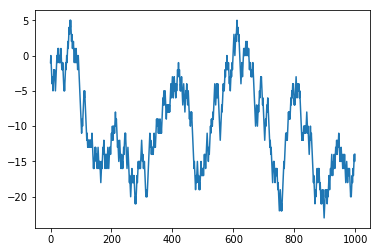

In [3]:
walker = RandomWalker()
plt.plot(walker.walk(1000))
plt.show()

In [4]:
%%timeit -n 1000
walker.walk(1000)

1000 loops, best of 3: 1.63 ms per loop


### Random Walk: solução procedural

In [5]:
def random_walk(n):
    position = 0
    walk = [position]
    for i in range(n):
        position += random.choice([-1, 1])
        walk.append(position)
    return walk

In [6]:
%%timeit -n 1000
walk = random_walk(1000)

1000 loops, best of 3: 1.35 ms per loop


### Random Walk: solução vetorizada com `itertools`

In [7]:
from itertools import accumulate
accumulate([1,2,3,4,5])

In [8]:
list(_)

[1, 3, 6, 10, 15]

In [9]:
def random_walk_itertools(n):
    steps = random.choices([-1, 1], k=n)  # choice plural, Py ≥ 3.6
    return [0]+list(accumulate(steps))

In [10]:
%%timeit -n 1000
walk = random_walk_itertools(1000)

1000 loops, best of 3: 325 µs per loop


### Random Walk: solução vetorizada com NumPy

In [11]:
import numpy as np

def random_walk_numpy(n):
    steps = np.random.choice([-1, 1], n)  # choice singular!
    return np.cumsum(steps)

In [12]:
%%timeit -n 1000
walk = random_walk_numpy(1000)

1000 loops, best of 3: 31.1 µs per loop


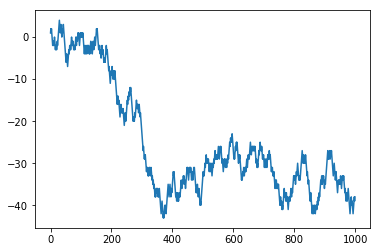

In [13]:
plt.plot(random_walk_numpy(1000))
plt.show()

## Comparando desempenhos

In [14]:
from timeit import timeit

def cronometrar(expr, vezes=1000):
    return timeit(expr, globals=globals(), number=vezes) / vezes
     
casos = ['RandomWalker().walk(1000)',
          'random_walk(1000)',
          'random_walk_itertools(1000)',
          'random_walk_numpy(1000)',
         ]

In [15]:
tempos = []
for caso in casos:
    t = cronometrar(caso)
    print(f'{t:07f}s', caso, sep='\t')
    tempos.append(t)

0.001780s	RandomWalker().walk(1000)
0.001355s	random_walk(1000)
0.000339s	random_walk_itertools(1000)
0.000035s	random_walk_numpy(1000)


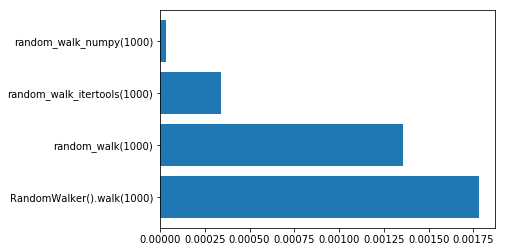

In [16]:
fig, ax = plt.subplots()
posições = np.arange(len(casos))
ax.barh(posições, tempos)
ax.set_yticks(posições)
ax.set_yticklabels(casos)
plt.show()

## Referências

* [From Python to Numpy](http://www.labri.fr/perso/nrougier/from-python-to-numpy/) (veja também a [bibliografia](http://www.labri.fr/perso/nrougier/from-python-to-numpy/#bibliography) deste livro livre)
   
* StackExchange: [How do I move away from the “for-loop” school of thought?](https://softwareengineering.stackexchange.com/questions/254475/how-do-i-move-away-from-the-for-loop-school-of-thought)